<a href="https://colab.research.google.com/github/Jeevssss/Project-5-Used-Cars-India-Sales-/blob/main/Project_5_Used_Cars_(India_Sales).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preparation**

In [1]:
# Import any neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read csv file
df = pd.read_csv('/content/used_cars_data.csv')

# Show first 10 rows of data
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


## **Data Understanding**

In [3]:
# Understanding the basic statistics in the dataset
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
# Understanding missing values in the dataset
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


## **Data Cleaning**

In [5]:
# Standardise the units of km/kg to kmpl
Mileage_New = []
test = df['Mileage'].astype(str)

for i in range(len(df)):

  if df.Fuel_Type[i] == 'CNG':

    value = test[i]

    if 'km/kg' in value:

      convert_cng = value[:-6]
      convert = float(convert_cng) * 0.72
      Mileage_New.append(convert_cng)

    else:

      Mileage_New.append(value)

  elif df.Fuel_Type[i] == 'LPG':

    value = test[i]

    if 'km/kg' in value:

      convert_lpg = value[:-6]
      convert_lpg = float(convert_lpg) * 0.54
      Mileage_New.append(convert_lpg)

    else:

      Mileage_New.append(value)
  else:

    # Handle cases where Fuel_Type is neither CNG nor LPG
    Mileage_New.append(test[i])

df['Mileage'] = Mileage_New
df['Mileage'].head(10)

,Mileage
0,26.6
1,19.67 kmpl
2,18.2 kmpl
3,20.77 kmpl
4,15.2 kmpl
5,11.394
6,23.08 kmpl
7,11.36 kmpl
8,20.54 kmpl
9,22.3 kmpl


Now, let's remove any NaN values to ensure data is clean for EDA

In [6]:
# Removing null values and replace it with mean
df['Engine'] = df['Engine'].fillna(df['Engine'].mean)
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean)
df['Seats'] = df['Seats'].fillna(df['Seats'].mean)
df['Power'] = df['Power'].fillna(df['Power'].mean)
df['Price'] = df['Price'].fillna(df['Price'].mean)

In [7]:
# Checking if all null values are removed
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [8]:
#df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
#df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')

In [9]:
# Convert the columns to string type before applying string operations
df['Engine'] = df['Engine'].astype(str).str.extract('(\d+)').astype(float)
df['Mileage'] = df['Mileage'].astype(str).str.extract('(\d+)').astype(float)
df['Power'] = df['Power'].astype(str).str.extract('(\d+)').astype(float)
df['Price'] = df['Price'].astype(str).str.extract('(\d+)').astype(float)
df['Seats'] = df['Seats'].astype(str).str.extract('(\d+)').astype(float)

In [10]:
# Checking data types after cleaning
df.dtypes

,0
S.No.,int64
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,float64
Engine,float64


In [11]:
# Drop irrelevant data
df.drop(['New_Price', 'S.No.'], axis=1, inplace=True)

In [12]:
# Display clean data
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.0,998.0,58.0,5.0,1.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.0,1582.0,126.0,5.0,12.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0,1199.0,88.0,5.0,4.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.0,1248.0,88.0,7.0,6.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968.0,140.0,5.0,17.0
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,11.0,814.0,55.0,5.0,2.0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.0,1461.0,63.0,5.0,3.0
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.0,2755.0,171.0,8.0,17.0
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.0,1598.0,103.0,5.0,5.0
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.0,1248.0,74.0,5.0,1.0


## **Data Vizualisation (EDA)**

<Axes: xlabel='Engine', ylabel='Power'>

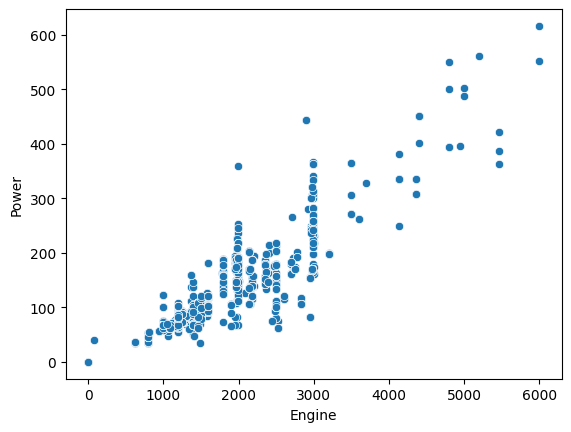

In [13]:
# Association between Engine and Power
sns.scatterplot(x='Engine', y='Power', data=df)

Task 2

Which location sells the most used cars?

Mumbai is known to have the most cars sold compared to the rest of the cities in India

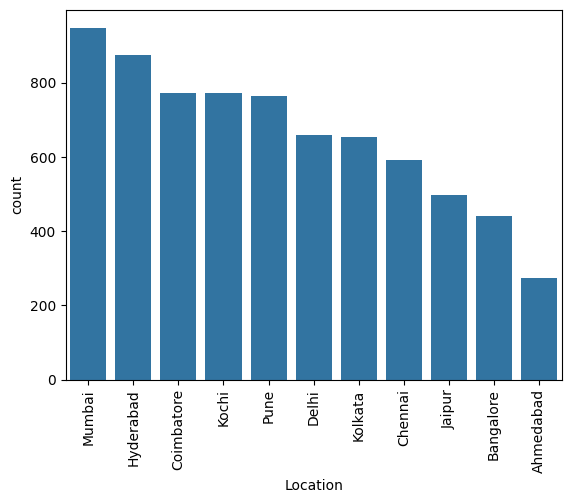

In [14]:
# Sort the column location in decending
sort_loc = df['Location'].value_counts().index

# Count plot to vizualise
sns.countplot(x='Location', data=df, order=sort_loc)
plt.xticks(rotation=90)
plt.show()

Task 3

Compare the owner type and the transmission. (Maybe there are first hand owner type who prefer manual whule second hand owners may consider automatic)

Based on the bar chart, it can be seen that majority of the people in india would prefer to use manual transmision regardless the owner type. Furthermore, the most sold cars are usually from the first hand. People in india would prefer to buy a new car that are manual transmision

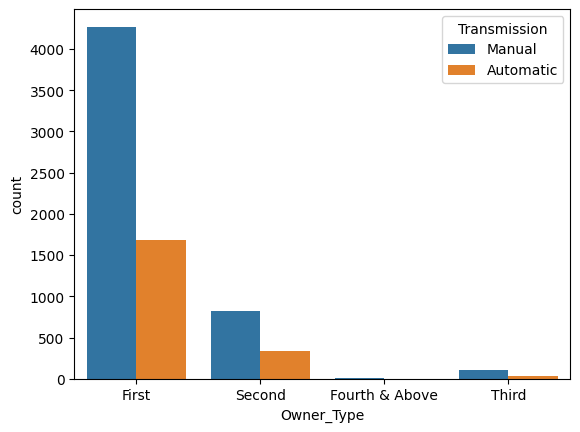

In [15]:
# Bar chart to compare the owner type and transmision used
sns.countplot(x='Owner_Type', hue='Transmission', data=df)
plt.show()

Task 4

Continuing from task 3,

Out of curiosity and knowledge of cars, usually manual transmission falls on the cheaper side and it is affordable. Hence, to prove my point, it clearly shows that in India the automatic transmission are always on the higher side of pricing regardless of the owner type. Nevertheless, it is shown that people in india would prefer to purchase a manual transmission over the automatic

<Axes: xlabel='Owner_Type', ylabel='Price'>

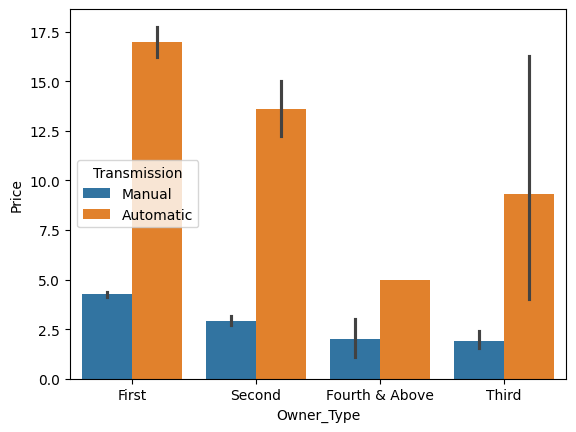

In [16]:
sns.barplot(x='Owner_Type', y='Price', hue='Transmission', data=df)

<Axes: >

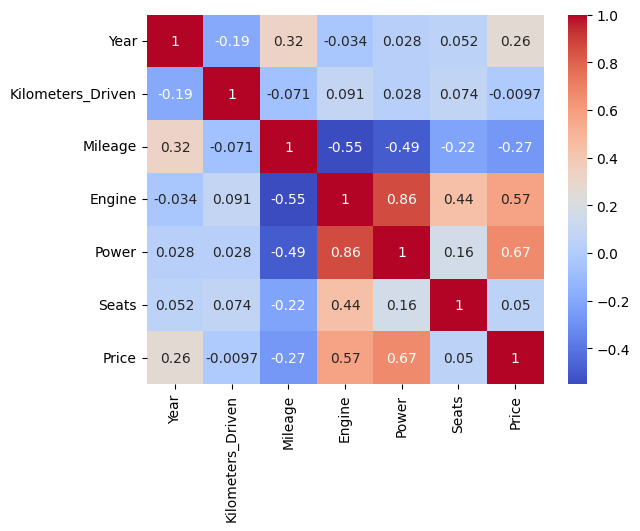

In [17]:
# The main purpose of this heatmap is to evaluate which variables are relevant for predicting
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')

## **Data Transformation**

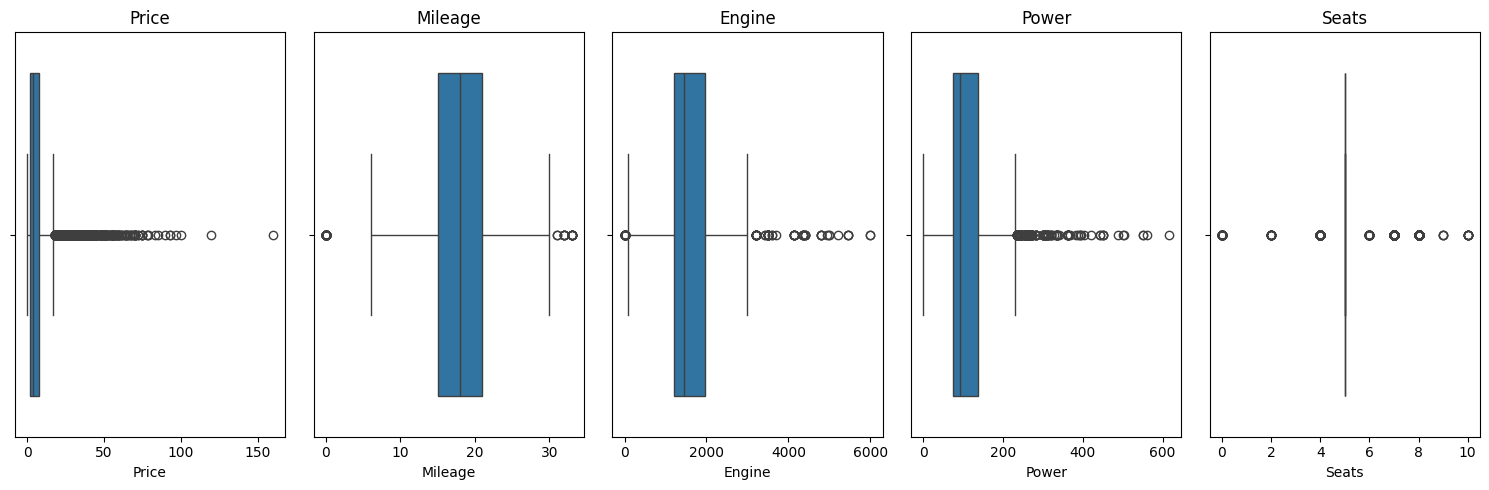

In [18]:
# Checking for outliers for price, mileage, engine, power and seats
price = df['Price']
mileage = df['Mileage']
engine = df['Engine']
power = df['Power']
seats = df['Seats']

fig, axs = plt.subplots(1,5, figsize=(15,5))

sns.boxplot(x=price, ax=axs[0])
axs[0].set_title('Price')

sns.boxplot(x=mileage, ax=axs[1])
axs[1].set_title('Mileage')

sns.boxplot(x=engine, ax=axs[2])
axs[2].set_title('Engine')

sns.boxplot(x=power, ax=axs[3])
axs[3].set_title('Power')

sns.boxplot(x=seats, ax=axs[4])
axs[4].set_title('Seats')

plt.tight_layout()
plt.show()

In [35]:
# Creating function for calculating IQR
def calculate_IQR(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  return IQR

# Creating function to calculate lower and higher bound
def calculate_bounds(df, column):
  IQR = calculate_IQR(df, column)
  lower_bound = df[column].quantile(0.25) - 1.5 * IQR
  upper_bound = df[column].quantile(0.75) + 1.5 * IQR
  return lower_bound, upper_bound

# Removing the outliers
def remove_outliers(df, column):
  lower_bound, upper_bound = calculate_bounds(df, column)
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

column = ['Price', 'Mileage', 'Engine', 'Power', 'Seats']
for i in column:
  df = remove_outliers(df, i)

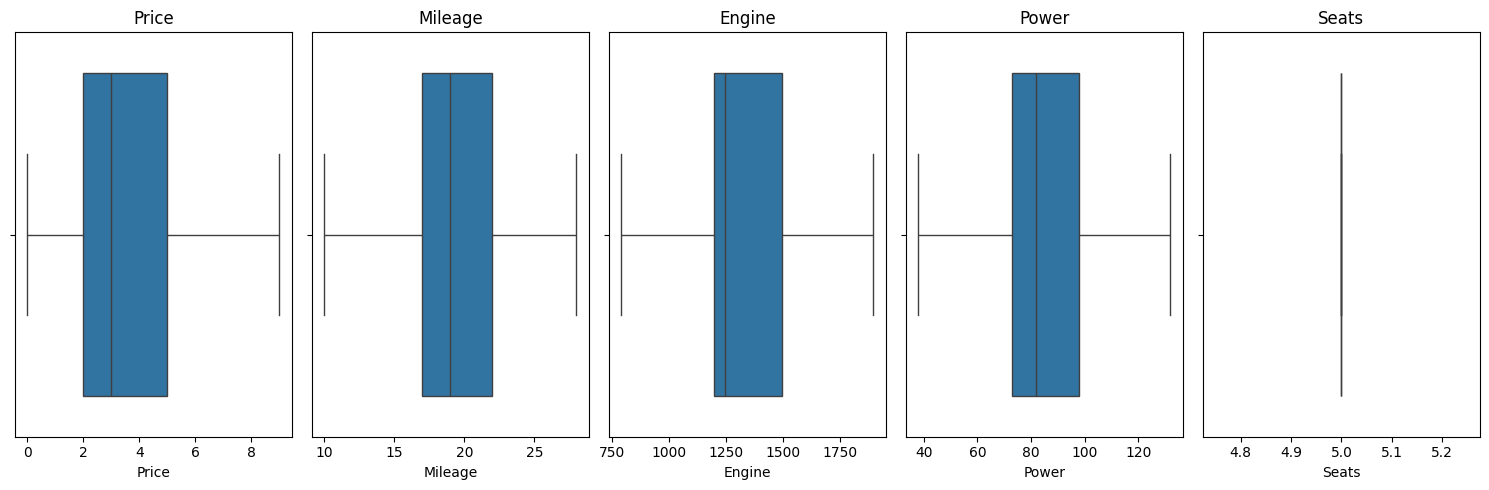

In [36]:
# Checking if outliers are removed from the five variables based on IQR method
price = df['Price']
mileage = df['Mileage']
engine = df['Engine']
power = df['Power']
seats = df['Seats']

fig, axs = plt.subplots(1,5, figsize=(15,5))

sns.boxplot(x=price, ax=axs[0])
axs[0].set_title('Price')

sns.boxplot(x=mileage, ax=axs[1])
axs[1].set_title('Mileage')

sns.boxplot(x=engine, ax=axs[2])
axs[2].set_title('Engine')

sns.boxplot(x=power, ax=axs[3])
axs[3].set_title('Power')

sns.boxplot(x=seats, ax=axs[4])
axs[4].set_title('Seats')

plt.tight_layout()
plt.show()

In [21]:
# Import any neccesary libraries
#from sklearn.preprocessing import LabelEncoder

In [22]:
# Defining LabelEncoder
#label_encoder = LabelEncoder()

# Transform ordinal and nominal values into one hot encoding using LabelEncoder
#df['Location'] = label_encoder.fit_transform(df['Location'])
#df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
#df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
#df['Owner_Type'] = label_encoder.fit_transform(df['Owner_Type'])

## **Data Modelling**

In [23]:
# Import any necessary libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

In [37]:
# X for independent values while y is the target variable
X = df[['Mileage', 'Engine', 'Power']]
y = df['Price']

# Split data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Model the linear regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the model
pred_lr = model_lr.predict(X_test)

## **Model Evaluation**

In [40]:
# Evaluate the model using MSE, RMSE, R2, Adjust R2 and MAE
mse_lr = mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, pred_lr)

print("MSE:", mse_lr)
print("R2:", r2_lr)
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)

MSE: 5.02000868814488
R2: 0.11850124412052598
RMSE: 2.2405375890943855
MAE: 1.7746816337295148


In [41]:
# Using cross validation to view the performance of the model
cv_scores = cross_val_score(model_lr, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [-1.49831563 -1.50388786 -1.4003816  -1.47565652 -3.78596011]


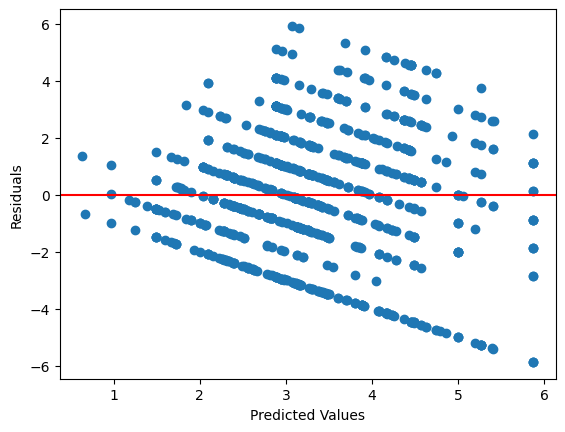

In [42]:
import matplotlib.pyplot as plt
residuals = y_test - pred_lr
plt.scatter(pred_lr, residuals)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

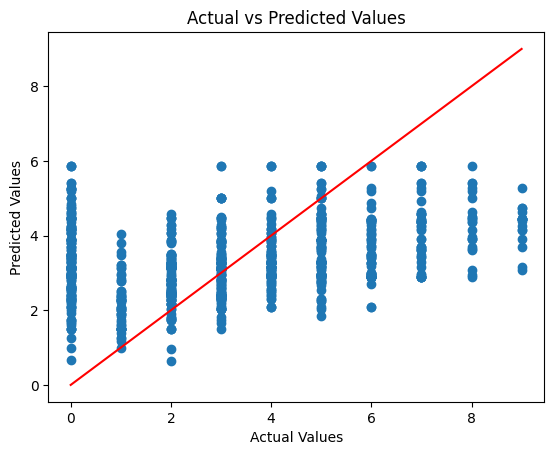

In [43]:
# Plotting actual vs predicted values
plt.scatter(y_test, pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

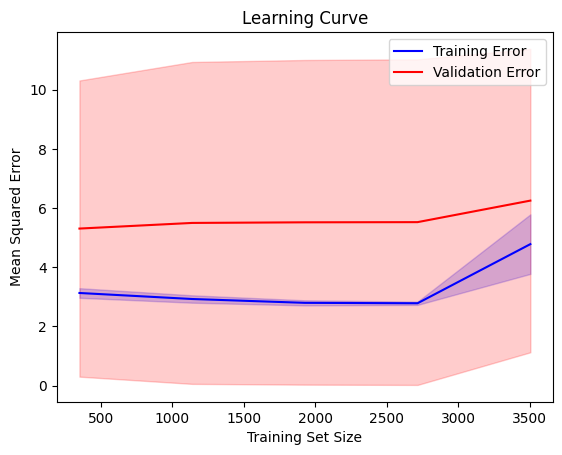

In [44]:
# Check if it is overfitting
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation for the training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label="Training Error", color="blue")
plt.plot(train_sizes, test_mean, label="Validation Error", color="red")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.show()

In [45]:
from sklearn.linear_model import Ridge, Lasso

# Ridge (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Evaluate Ridge model
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge R-squared (R²): {ridge_r2}")

# Lasso (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Evaluate Lasso model
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso R-squared (R²): {lasso_r2}")

Ridge R-squared (R²): 0.11850189948017109
Lasso R-squared (R²): 0.11951997082012666
